# Introduction to yfinance and TA-Lib

In [1]:
import yfinance as yf
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:


# Read and print the stock tickers that make up S&P500
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()

# Get the data for this tickers from yahoo finance
#data = yf.download(tickers.Symbol.to_list(),'2021-1-1','2021-7-12', auto_adjust=True)['Close']
#print(data.head())

Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                   Biotechnology   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989

In [2]:
msft = yf.Ticker("MSFyT")


msft

yfinance.Ticker object <MSFYT>

In [3]:
# get all stock info
msft.info

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/MSFYT?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=MSFYT&crumb=x4Wzz3tNPV7


{'trailingPegRatio': None}

In [79]:
# get historical market data
hist = msft.history(period="max")

In [80]:
hist.head()

Open      High       Low     Close      Volume  \
Date                                                                            
1986-03-13 00:00:00-05:00  0.054792  0.062849  0.054792  0.060163  1031788800   
1986-03-14 00:00:00-05:00  0.060163  0.063386  0.060163  0.062311   308160000   
1986-03-17 00:00:00-05:00  0.062311  0.063923  0.062311  0.063386   133171200   
1986-03-18 00:00:00-05:00  0.063386  0.063923  0.061237  0.061774    67766400   
1986-03-19 00:00:00-05:00  0.061774  0.062311  0.060163  0.060700    47894400   

                           Dividends  Stock Splits  
Date                                                
1986-03-13 00:00:00-05:00        0.0           0.0  
1986-03-14 00:00:00-05:00        0.0           0.0  
1986-03-17 00:00:00-05:00        0.0           0.0  
1986-03-18 00:00:00-05:00        0.0           0.0  
1986-03-19 00:00:00-05:00        0.0           0.0

In [48]:
hist.tail()

Open        High         Low       Close  \
Date                                                                        
2024-04-23 00:00:00-04:00  404.239990  408.200012  403.059998  407.570007   
2024-04-24 00:00:00-04:00  409.559998  412.470001  406.779999  409.059998   
2024-04-25 00:00:00-04:00  394.029999  399.890015  388.029999  399.040009   
2024-04-26 00:00:00-04:00  412.170013  413.000000  405.760010  406.320007   
2024-04-29 00:00:00-04:00  405.250000  406.320007  399.190002  402.250000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-04-23 00:00:00-04:00  15734500        0.0           0.0  
2024-04-24 00:00:00-04:00  15065300        0.0           0.0  
2024-04-25 00:00:00-04:00  40586500        0.0           0.0  
2024-04-26 00:00:00-04:00  29553600        0.0           0.0  
2024-04-29 00:00:00-04:00  19279000        0.0           0.0

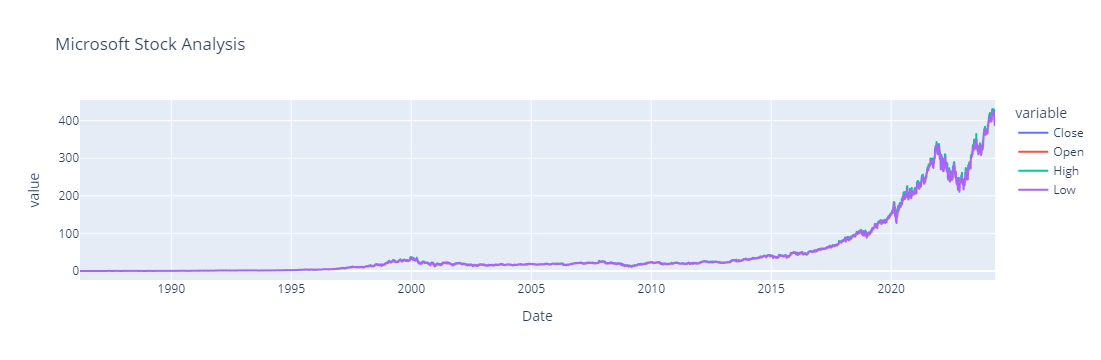

In [81]:
fig = px.line(hist, x = hist.index, y = [hist.Close,hist.Open,hist.High,hist.Low], title='Microsoft Stock Analysis')
fig.show()

In [23]:
# show meta information about the history (requires history() to be called first)
msft.history_metadata

{'currency': 'USD',
 'symbol': 'MSFT',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 511108200,
 'regularMarketTime': 1714420801,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 402.25,
 'fiftyTwoWeekHigh': 406.32,
 'fiftyTwoWeekLow': 399.19,
 'regularMarketDayHigh': 406.32,
 'regularMarketDayLow': 399.19,
 'regularMarketVolume': 19256715,
 'chartPreviousClose': 0.097,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1714464000,
   'end': 1714483800,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1714483800,
   'end': 1714507200,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1714507200,
   'end': 1714521600,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y'

In [24]:
# show actions (dividends, splits, capital gains)
msft.actions
#msft.dividends
#msft.splits
#msft.capital_gains  # only for mutual funds & etfs



Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2023-02-15 00:00:00-05:00       0.68           0.0
2023-05-17 00:00:00-04:00       0.68           0.0
2023-08-16 00:00:00-04:00       0.68           0.0
2023-11-15 00:00:00-05:00       0.75           0.0
2024-02-14 00:00:00-05:00       0.75           0.0

[90 rows x 2 columns]

In [25]:
# show share count
msft.get_shares_full(start="2022-01-01", end=None)

2022-01-27 00:00:00-05:00    7496869888
2022-02-04 00:00:00-05:00    7800719872
2022-02-05 00:00:00-05:00    7496869888
2022-02-11 00:00:00-05:00    7496869888
2022-03-04 00:00:00-05:00    7605040128
                                ...    
2024-04-25 00:00:00-04:00    7617019904
2024-04-25 00:00:00-04:00    7430439936
2024-04-26 00:00:00-04:00    7430439936
2024-04-27 00:00:00-04:00    7432309760
2024-04-30 00:00:00-04:00    7432309760
Length: 174, dtype: int64

In [26]:
# show financials:
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options



2024-03-31     2023-12-31  \
Free Cash Flow                                  20965000000.0   9118000000.0   
Repurchase Of Capital Stock                     -4213000000.0  -4000000000.0   
Repayment Of Debt                              -11589000000.0  -2916000000.0   
Issuance Of Debt                                 6352000000.0  10773000000.0   
Issuance Of Capital Stock                         522000000.0    261000000.0   
Capital Expenditure                            -10952000000.0  -9735000000.0   
End Cash Position                               19634000000.0  17305000000.0   
Beginning Cash Position                         17305000000.0  80452000000.0   
Effect Of Exchange Rate Changes                   -80000000.0     72000000.0   
Changes In Cash                                  2409000000.0 -63219000000.0   
Financing Cash Flow                            -18808000000.0 -10147000000.0   
Cash Flow From Continuing Financing Activities -18808000000.0 -10147000000.0   
Net Other Financing Charges                      -498000000.0   -201000000.0   
Cash Dividends Paid                             -5572000000.0  -5574000000.0   
Common Stock Dividend Paid                      -5572000000.0  -5574000000.0   
Net Common Stock Issuance                       -3691000000.0  -3739000000.0   
Common Stock Payments                           -4213000000.0  -4000000000.0   
Common Stock Issuance                             522000000.0    261000000.0   
Net Issuance Payments Of Debt                   -9047000000.0   -633000000.0   
Net Short Term Debt Issuance                    -3810000000.0  -8490000000.0   
Short Term Debt Issuance                                  NaN            NaN   
Net Long Term Debt Issuance                     -5237000000.0   7857000000.0   
Long Term Debt Payments                        -11589000000.0  -2916000000.0   
Long Term Debt Issuance                          6352000000.0  10773000000.0   
Investing Cash Flow                            -10700000000.0 -71925000000.0   
Cash Flow From Continuing Investing Activities -10700000000.0 -71925000000.0   
Net Other Investing Changes                     -1281000000.0   1347000000.0   
Net Investment Purchase And Sale                 3108000000.0   1492000000.0   
Sale Of Investment                               5291000000.0   5750000000.0   
Purchase Of Investment                          -2183000000.0  -4258000000.0   
Net Business Purchase And Sale                  -1575000000.0 -65029000000.0   
Purchase Of Business                            -1575000000.0 -65029000000.0   
Net PPE Purchase And Sale                      -10952000000.0  -9735000000.0   
Purchase Of PPE                                -10952000000.0  -9735000000.0   
Operating Cash Flow                             31917000000.0  18853000000.0   
Cash Flow From Continuing Operating Activities  31917000000.0  18853000000.0   
Change In Working Capital                        2522000000.0 -10300000000.0   
Change In Other Working Capital                  1977000000.0  -7092000000.0   
Change In Other Current Liabilities              2851000000.0   1492000000.0   
Change In Other Current Assets                  -1186000000.0   -702000000.0   
Change In Payables And Accrued Expense            648000000.0  -2521000000.0   
Change In Payable                                 648000000.0  -2521000000.0   
Change In Account Payable                         648000000.0  -2521000000.0   
Change In Inventory                               260000000.0   1474000000.0   
Change In Receivables                           -2028000000.0  -2951000000.0   
Changes In Account Receivables                  -2028000000.0  -2951000000.0   
Stock Based Compensation                         2703000000.0   2828000000.0   
Deferred Tax                                    -1323000000.0  -1702000000.0   
Deferred Income Tax                             -1323000000.0  -1702000000.0   
Depreciation Amortization Depletion              60

In [28]:
# show holders
msft.major_holders
msft.institutional_holders
#msft.mutualfund_holders
#msft.insider_transactions
#msft.insider_purchases
#msft.insider_roster_holders



Date Reported                             Holder  pctHeld     Shares  \
0    2023-06-30                 Vanguard Group Inc   0.0879  653247546   
1    2023-06-30                     Blackrock Inc.   0.0722  536245027   
2    2023-06-30           State Street Corporation   0.0395  293614078   
3    2023-06-30                           FMR, LLC   0.0283  210111250   
4    2023-06-30      Price (T.Rowe) Associates Inc   0.0215  159904219   
5    2023-06-30      Geode Capital Management, LLC   0.0199  148129470   
6    2023-06-30                     Morgan Stanley   0.0166  123498322   
7    2023-06-30          JP Morgan Chase & Company   0.0152  113024837   
8    2022-12-31  Norges Bank Investment Management   0.0116   86316926   
9    2023-06-30            Capital World Investors   0.0115   85507261   

          Value  
0  222456919314  
1  182612881494  
2   99987338122  
3   71551285075  
4   54453782738  
5   50444009713  
6   42056118573  
7   38489477991  
8   20700525193  
9   29118642660

In [ ]:
# show recommendations
msft.recommendations
msft.recommendations_summary
msft.upgrades_downgrades

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts

# Historical Data

In [31]:
## One Ticker
MSFT = yf.Ticker('MSFT')
data = MSFT.history(period="max")

In [32]:
data.head()

Open      High       Low     Close      Volume  \
Date                                                                            
1986-03-13 00:00:00-05:00  0.054792  0.062849  0.054792  0.060163  1031788800   
1986-03-14 00:00:00-05:00  0.060163  0.063386  0.060163  0.062311   308160000   
1986-03-17 00:00:00-05:00  0.062311  0.063923  0.062311  0.063386   133171200   
1986-03-18 00:00:00-05:00  0.063386  0.063923  0.061237  0.061774    67766400   
1986-03-19 00:00:00-05:00  0.061774  0.062311  0.060163  0.060700    47894400   

                           Dividends  Stock Splits  
Date                                                
1986-03-13 00:00:00-05:00        0.0           0.0  
1986-03-14 00:00:00-05:00        0.0           0.0  
1986-03-17 00:00:00-05:00        0.0           0.0  
1986-03-18 00:00:00-05:00        0.0           0.0  
1986-03-19 00:00:00-05:00        0.0           0.0

In [33]:
fig = px.line(data, x = data.index, y = data.Close, title='META Stock Analysis')
fig.show()


In [ ]:
## Multiple Tickers

In [83]:
tickers = yf.Tickers('msft aapl goog')
tickers.tickers


{'MSFT': yfinance.Ticker object <MSFT>,
 'AAPL': yfinance.Ticker object <AAPL>,
 'GOOG': yfinance.Ticker object <GOOG>}

In [ ]:
# access each ticker using (example)
tickers.tickers['MSFT'].info
tickers.tickers['AAPL'].history(period="1mo")
tickers.tickers['GOOG'].actions

In [39]:
tickers.tickers["MSFT"].history()

Open        High         Low       Close  \
Date                                                                        
2024-04-01 00:00:00-04:00  423.950012  427.890015  422.220001  424.570007   
2024-04-02 00:00:00-04:00  420.109985  422.380005  417.839996  421.440002   
2024-04-03 00:00:00-04:00  419.730011  423.260010  419.089996  420.450012   
2024-04-04 00:00:00-04:00  424.989990  428.670013  417.570007  417.880005   
2024-04-05 00:00:00-04:00  420.010010  426.510010  418.320007  425.519989   
2024-04-08 00:00:00-04:00  425.170013  427.279999  423.299988  424.589996   
2024-04-09 00:00:00-04:00  426.440002  427.739990  421.619995  426.279999   
2024-04-10 00:00:00-04:00  422.190002  424.029999  419.700012  423.260010   
2024-04-11 00:00:00-04:00  425.820007  429.369995  422.359985  427.929993   
2024-04-12 00:00:00-04:00  424.049988  425.179993  419.769989  421.899994   
2024-04-15 00:00:00-04:00  426.600006  426.820007  413.429993  413.640015   
2024-04-16 00:00:00-04:00  414.570007  418.399994  413.730011  414.579987   
2024-04-17 00:00:00-04:00  417.250000  418.880005  410.329987  411.839996   
2024-04-18 00:00:00-04:00  410.630005  411.890015  403.950012  404.269989   
2024-04-19 00:00:00-04:00  404.029999  405.480011  397.769989  399.119995   
2024-04-22 00:00:00-04:00  400.079987  402.850006  395.750000  400.959991   
2024-04-23 00:00:00-04:00  404.239990  408.200012  403.059998  407.570007   
2024-04-24 00:00:00-04:00  409.559998  412.470001  406.779999  409.059998   
2024-04-25 00:00:00-04:00  394.029999  399.890015  388.029999  399.040009   
2024-04-26 00:00:00-04:00  412.170013  413.000000  405.760010  406.320007   
2024-04-29 00:00:00-04:00  405.250000  406.320007  399.190002  402.250000   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-04-01 00:00:00-04:00  16316000        0.0           0.0  
2024-04-02 00:00:00-04:00  17912000        0.0           0.0  
2024-04-03 00:00:00-04:00  16502300        0.0           0.0  
2024-04-04 00:00:00-04:00  19370900        0.0           0.0  
2024-04-05 00:00:00-04:00  16544300        0.0           0.0  
2024-04-08 00:00:00-04:00  14272400        0.0           0.0  
2024-04-09 00:00:00-04:00  12512300        0.0           0.0  
2024-04-10 00:00:00-04:00  16216600        0.0           0.0  
2024-04-11 00:00:00-04:00  17966400        0.0           0.0  
2024-04-12 00:00:00-04:00  19232100        0.0           0.0  
2024-04-15 00:00:00-04:00  20273500        0.0           0.0  
2024-04-16 00:00:00-04:00  16765600        0.0           0.0  
2024-04-17 00:00:00-04:00  15855500        0.0           0.0  
2024-04-18 00:00:00-04:00  21029900        0.0           0.0  
2024-04-19 00:00:00-04:00  30276500        0.0           0.0  
2024-04-22 00:00:00-04:00  20286900        0.0           0.0  
2024-04-23 00:00:00-04:00  15734500        0.0           0.0  
2024-04-24 00:00:00-04:00  15065300        0.0           0.0  
2024-04-25 00:00:00-04:00  40586500        0.0           0.0  
2024-04-26 00:00:00-04:00  29553600        0.0           0.0  
2024-04-29 00:00:00-04:00  19279000        0.0           0.0

In [85]:
start_date = pd.Timestamp.now() - pd.DateOffset(months=1)
end_date = pd.Timestamp.now()

apple_data = yf.download('AAPL', start=start_date, end=end_date,interval='1h')
ibm_data = yf.download('IBM', start=start_date, end=end_date,interval='1h')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [86]:
ibm_data.head()

Open        High         Low       Close  \
Datetime                                                                    
2024-04-01 09:30:00-04:00  190.000000  190.460007  189.250000  189.822006   
2024-04-01 10:30:00-04:00  189.845001  189.870804  189.273804  189.449997   
2024-04-01 11:30:00-04:00  189.449997  189.449997  188.520004  189.135193   
2024-04-01 12:30:00-04:00  189.164993  189.479996  189.089996  189.169998   
2024-04-01 13:30:00-04:00  189.169998  189.440002  189.070007  189.149994   

                            Adj Close  Volume  
Datetime                                       
2024-04-01 09:30:00-04:00  189.822006  374962  
2024-04-01 10:30:00-04:00  189.449997  184268  
2024-04-01 11:30:00-04:00  189.135193  205011  
2024-04-01 12:30:00-04:00  189.169998  217996  
2024-04-01 13:30:00-04:00  189.149994  133443

In [87]:
ibm_data.tail()

Open        High         Low       Close  \
Datetime                                                                    
2024-04-29 11:30:00-04:00  167.000000  167.000000  166.460007  166.638107   
2024-04-29 12:30:00-04:00  166.619995  167.110001  166.460007  166.820007   
2024-04-29 13:30:00-04:00  166.860001  167.029999  166.615005  166.770996   
2024-04-29 14:30:00-04:00  166.779999  167.079193  166.225006  166.559998   
2024-04-29 15:30:00-04:00  166.570007  167.479996  166.309998  167.429993   

                            Adj Close  Volume  
Datetime                                       
2024-04-29 11:30:00-04:00  166.638107  359381  
2024-04-29 12:30:00-04:00  166.820007  270452  
2024-04-29 13:30:00-04:00  166.770996  394333  
2024-04-29 14:30:00-04:00  166.559998  478658  
2024-04-29 15:30:00-04:00  167.429993  868397

## TA-Lib
It is a Technical Analysis library useful to do feature engineering from financial time series datasets (Open, Close, High, Low, Volume). It is built on Pandas and Numpy.

In [89]:
def calculate_indicators(data):
    data['SMA'] = ta.SMA(data['Close'], timeperiod=20)
    data['RSI'] = ta.RSI(data['Close'], timeperiod=14)
    return data

apple_data = calculate_indicators(apple_data)
ibm_data = calculate_indicators(ibm_data)

In [90]:

apple_data.head()

Open        High         Low       Close  \
Datetime                                                                    
2024-04-01 09:30:00-04:00  171.187500  171.220001  169.835007  170.089905   
2024-04-01 10:30:00-04:00  170.089005  170.160004  169.479996  169.845001   
2024-04-01 11:30:00-04:00  169.839996  170.080002  169.585007  169.895004   
2024-04-01 12:30:00-04:00  169.895004  170.020004  169.759995  169.915695   
2024-04-01 13:30:00-04:00  169.919998  170.089996  169.880005  169.994995   

                            Adj Close    Volume  SMA  RSI  
Datetime                                                   
2024-04-01 09:30:00-04:00  170.089905  12016910  NaN  NaN  
2024-04-01 10:30:00-04:00  169.845001   5566284  NaN  NaN  
2024-04-01 11:30:00-04:00  169.895004   4325649  NaN  NaN  
2024-04-01 12:30:00-04:00  169.915695   2857559  NaN  NaN  
2024-04-01 13:30:00-04:00  169.994995   2605346  NaN  NaN

In [91]:

def plot_data(data, title):
    fig = px.line(data, x = data.index, y = [data.SMA,data.RSI], title=title)
    fig.show()
    
    
    

In [92]:
plot_data(apple_data, 'Apple Stock Analysis')

In [93]:
plot_data(ibm_data, 'IBM Stock Analysis')


In [94]:
fb = yf.Ticker("META")
df = fb.history(start="2024-01-01",interval="1h")
df.head()

Open        High         Low       Close  \
Datetime                                                                    
2024-01-02 09:30:00-05:00  352.790009  353.160004  341.500000  341.570007   
2024-01-02 10:30:00-05:00  341.529999  344.239990  340.010010  344.021393   
2024-01-02 11:30:00-05:00  344.079987  346.835205  344.059998  345.220001   
2024-01-02 12:30:00-05:00  345.250000  345.839996  343.000000  344.179993   
2024-01-02 13:30:00-05:00  344.160004  344.450012  342.380005  344.220001   

                            Volume  Dividends  Stock Splits  
Datetime                                                     
2024-01-02 09:30:00-05:00  4971793        0.0           0.0  
2024-01-02 10:30:00-05:00  3113774        0.0           0.0  
2024-01-02 11:30:00-05:00  1858825        0.0           0.0  
2024-01-02 12:30:00-05:00  1306669        0.0           0.0  
2024-01-02 13:30:00-05:00  1276627        0.0           0.0

In [95]:
plt.style.use('fivethirtyeight')
df['MA'] = ta.SMA(df['Close'],timeperiod=5)

fig = px.line(df, x = df.index, y = [df.Close,df.MA], title='META Stock Analysis')
fig.show()

In [96]:
#plt.style.use('fivethirtyeight')
df['MA'] = ta.SMA(df['Close'],timeperiod=5)
df['EMA'] = ta.EMA(df['Close'], timeperiod = 5)
macd, macd_signal, _ = ta.MACD(df['Close'])
df['MACD'] = macd
df['MACD_Signal'] = macd_signal

fig = px.line(df, x = df.index, y = [df.Close,df.MA, df.EMA], title='META Stock Analysis')
fig.show()


In [97]:

fig = px.line(df,x = df.index, y = [df.MACD,df.MACD_Signal], title='META Stock Analysis')
fig.show()


In [98]:
# RSI
df['RSI'] = ta.RSI(df['Close'],14)
fig = px.line(df, x = df.index, y = df.RSI, title='META Stock Analysis')
fig.show()

## Bollinger Bands

Bollinger band is a volatility or standard deviation based oscillator which comprises three components. The middle band is a moving average line and the other two bands are predetermined, usually two, standard deviations away from the moving average line.

As the volatility of the stock prices changes, the gap between the bands also changes. During more volatile markets the gap widens and amid low volatility conditions, the gap contracts.

### Calculation for Bollinger Bands

Bollinger bands involve the following calculations:

    Middle Band: 30 Day moving average
    Upper Band: Middle Band  + 2 x 30 Day Moving Standard Deviation
    Lower Band: Middle Band  – 2 x 30 Day Moving Standard Deviation

As with most technical indicators, values for the look-back period and the number of standard deviations can be modified to fit the characteristics of a particular asset or trading style.

In [99]:

# Compute the Bollinger Bands 
def BBANDS(data, n=15):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 

In [100]:
# Retrieve the Goolge stock data from Yahoo finance
data = yf.download('GOOGL', start="2020-01-01", end="2022-04-30")

# Compute the Bollinger Bands for Google using the 50-day Moving average
n = 50
BBANDS = BBANDS(data, n)

[*********************100%%**********************]  1 of 1 completed

In [101]:
px.line(BBANDS, x = BBANDS.index, y = [BBANDS.UpperBand,BBANDS.LowerBand,BBANDS.MiddleBand,BBANDS.Close], title='META Stock Analysis')

In [102]:
raw_data = pd.read_csv("raw_analyst_ratings.csv")

In [103]:
raw_data.head()

Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00     A  
3  2020-05-22 12:45:06-04:00     A  
4  2020-05-22 11:38:59-04:00     A

In [104]:
raw_data.tail()

Unnamed: 0                                           headline  \
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url       publisher  \
1407323  https://www.benzinga.com/news/11/08/1888782/to...   Monica Gerson   
1407324  https://www.benzinga.com/news/earnings/11/06/1...    Benjamin Lee   
1407325  https://www.benzinga.com/analyst-ratings/analy...  BenzingaStaffL   
1407326  https://www.benzinga.com/analyst-ratings/price...       Joe Young   
1407327  https://www.benzinga.com/news/ipos/11/05/10789...   Allie Wickman   

                        date stock  
1407323  2011-08-29 00:00:00    ZX  
1407324  2011-06-22 00:00:00    ZX  
1407325  2011-06-21 00:00:00    ZX  
1407326  2011-06-21 00:00:00    ZX  
1407327  2011-05-12 00:00:00    ZX

In [65]:
symbols = raw_data["stock"].unique()

In [66]:
len(symbols)

6204

In [71]:
symbols[:15]

array(['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI',
       'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL'], dtype=object)

In [73]:
a = yf.Ticker('A')

In [74]:
data = a.history(period='max')

In [75]:
fig = px.line(data, x = data.index, y = data.Close, title='A Stock Analysis')
fig.show()

# PyFolio

This project is no longer maintained since Quantopian no longer mantains it.

In [7]:
# ! pip3 install pyfolio-reloaded
# ! pip3 install zipline-reloaded

In [5]:
stock_rets = pf.utils.get_symbol_rets('META')
stock_rets.head()

[*********************100%%**********************]  1 of 1 completed


Date
2012-05-21 00:00:00+00:00   -0.109861
2012-05-22 00:00:00+00:00   -0.089039
2012-05-23 00:00:00+00:00    0.032258
2012-05-24 00:00:00+00:00    0.032187
2012-05-25 00:00:00+00:00   -0.033909
Name: META, dtype: float64

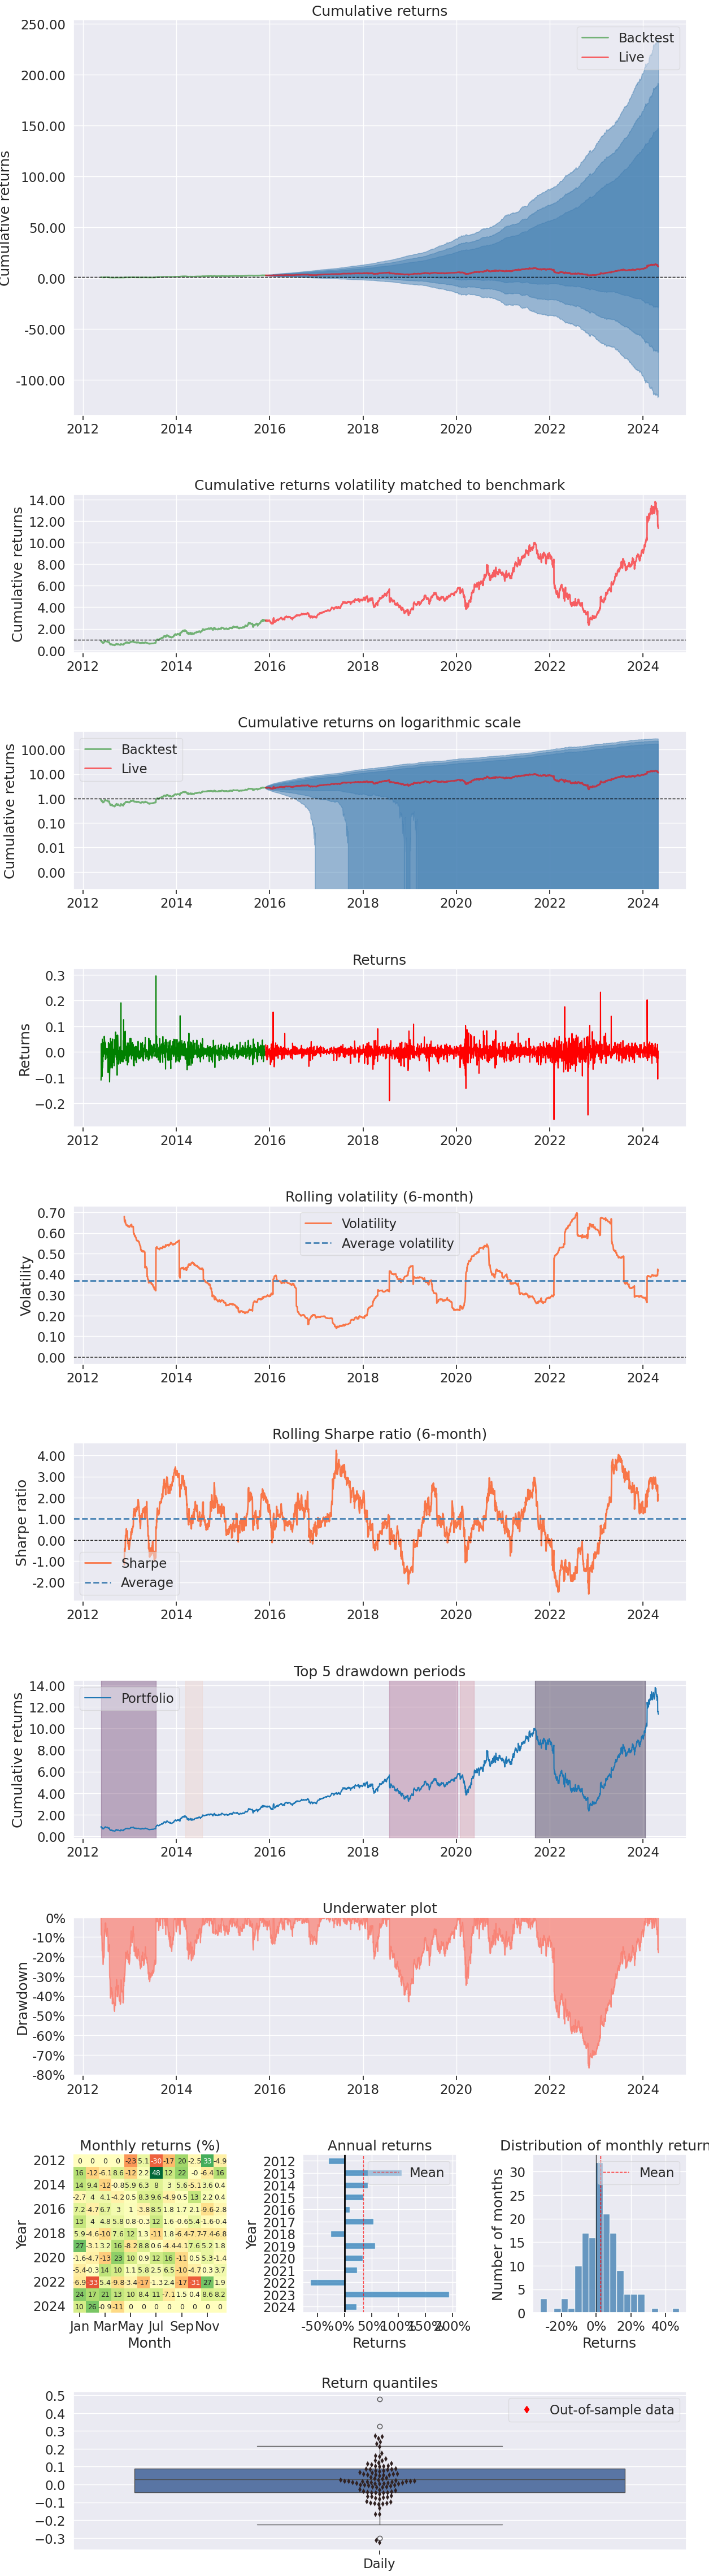

In [6]:
pf.create_returns_tear_sheet(stock_rets, live_start_date='2015-12-1')